<div class="alert alert-success">
  <strong>DATASET:</strong> 5j0n_uniform_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,2.0_AngShift0.0,0.0,0.0.h5
    <hr/>
    <strong>PROJECTION DISTANCE (d_P):</strong> estimated distances (model nosiy_var0.h5) with limit < 0.5
</div>

# Reconstruction

<div class="alert alert-danger">
  <strong>NOTE:</strong> This is done on a PC where I don't need X11 forwarding (since <code>mayavi</code> is a graphic package, and the lab's server doesn't support X11).
</div>

Reference: https://tomroelandts.com/articles/astra-toolbox-tutorial-reconstruction-from-projection-images-part-2

In [10]:
# !pip install mayavi

In [1]:
# !pip install gast

In [2]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [3]:
import numpy as np
from os import mkdir
from os.path import join, isdir
from imageio import imread, imwrite
import matplotlib.pyplot as plt
import astra
import h5py
import os
import mrcfile
#from tvtk.api import tvtk
from mayavi import mlab
from IPython.display import Image
import sys
sys.path.append("../..") 
from cryoem.reconstruction import reconstruct
from cryoem.conversions import quaternion2euler

---

# Reconstruction with Ground-Truth Angles

## Reconstruction

In [23]:
projections = np.load("data/projections_estimated_le0.5_50k.npy")
angles_predicted = np.load("data/angles_true_estimated_le0.5_50k.npy")
reconstruction = reconstruct(projections[:3000], angles_predicted[:3000], mrc_filename=None)

In [24]:
mlab.contour3d(reconstruction, transparent=True)
mlab.colorbar(orientation='vertical')
# mlab.savefig("data/5a1a_projections_and_angles.tiff")
mlab.show()

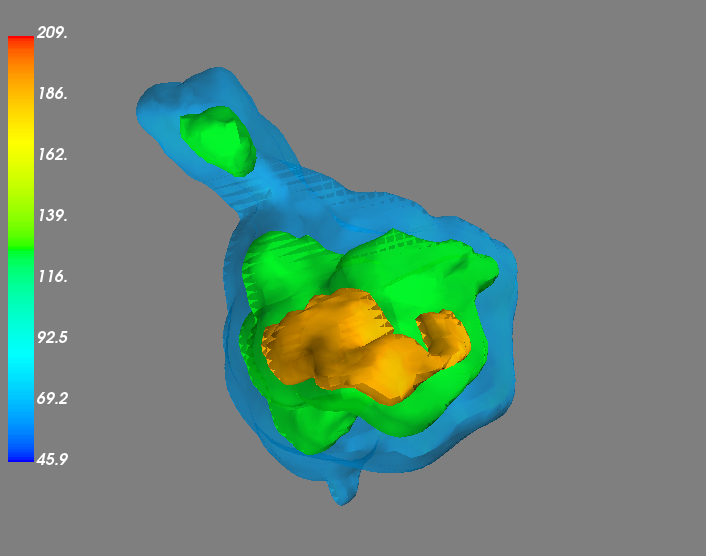

In [8]:
Image(filename='data/ground_truth_reconstruction.png')

---

# Reconstruction after Angle Recovery

## Reconstruction

In [26]:
projections = np.load("data/projections_estimated_le0.5_50k.npy")
angles_predicted = np.load("data/angles_predicted_estimated_le0.5_50k.npy")
reconstruction = reconstruct(projections[:3000], angles_predicted[:3000], mrc_filename=None)

In [27]:
mlab.contour3d(reconstruction, transparent=True)
mlab.colorbar(orientation='vertical')
# mlab.savefig("data/5a1a_projections_and_angles.tiff")
mlab.show()

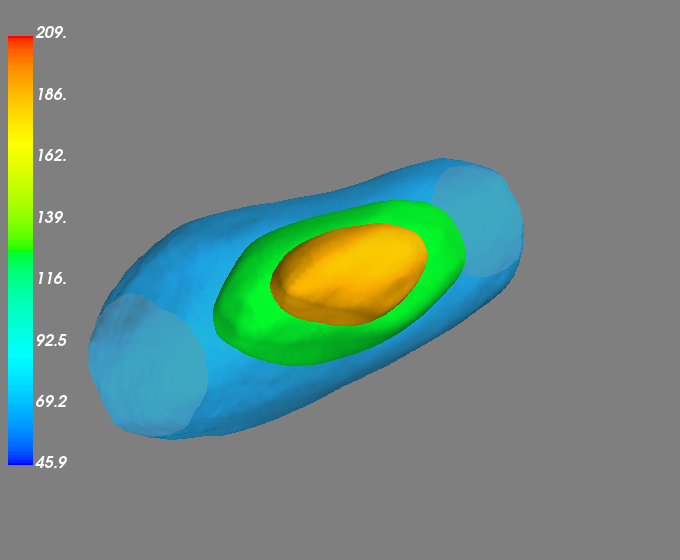

In [14]:
Image(filename='data/estimated_le0.5_50k_not_aligned.png')

---

# Reconstruction after Angle Alignment

## Reconstruction

In [15]:
projections = np.load("data/projections_estimated_le0.5_50k")
angles_predicted = np.load("data/angles_predicted_rotated_estimated_le0.5_50k.npy")
reconstruction = reconstruct(projections[:3000], angles_predicted[:3000], mrc_filename=None)

In [19]:
mlab.contour3d(reconstruction, transparent=True)
mlab.colorbar(orientation='vertical')
# mlab.savefig("data/5a1a_projections_and_angles.tiff")
mlab.show()

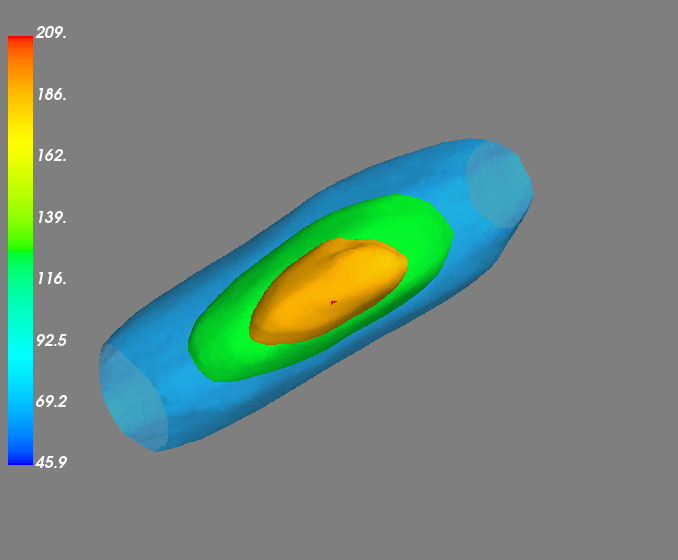

In [20]:
Image(filename='data/estimated_le0.5_50k_aligned.png')

---